In [1]:
from sklearn import datasets
import pandas as pd
from sklearn import preprocessing
from sklearn import cross_validation

In [2]:
data = datasets.load_iris()

In [3]:
data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
dataset = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
# labels = pd.DataFrame(data.target, columns = data.target_names)
# labels.head()
labels = pd.Series(data.target)

In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(dataset, labels, test_size=0.3, random_state=0)

In [7]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(105, 4) (105,)
(45, 4) (45,)


In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [30]:

clf = tree.DecisionTreeClassifier()


In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
y_pred = clf.predict(X_test)

In [45]:
clf.score(X_test, y_test)

0.97777777777777775

In [34]:
importances = clf.feature_importances_
#importances.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [59]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
from sklearn import metrics
print metrics.f1_score(y_test, y_pred)
print metrics.accuracy_score(y_test, y_pred)
print metrics.precision_recall_curve(y_test, y_pred)

0.977943409248
0.977777777778


/Users/mirunapopa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


ValueError: Data is not binary and pos_label is not specified

In [50]:
from sklearn import learning_curve

In [51]:
learning_curve.learning_curve(tree.DecisionTreeClassifier(),X_train,y_train)

(array([ 6, 22, 37, 53, 69]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[ 0.61111111,  0.51428571,  0.5       ],
        [ 0.88888889,  0.71428571,  0.67647059],
        [ 0.94444444,  0.94285714,  0.94117647],
        [ 0.91666667,  1.        ,  0.94117647],
        [ 0.94444444,  1.        ,  0.94117647]]))

In [52]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


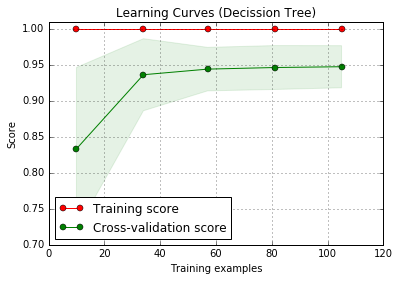

In [58]:
title = "Learning Curves (Decission Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(dataset.shape[0], n_iter=100,
                                   test_size=0.3, random_state=0)

estimator = tree.DecisionTreeClassifier()
plot_learning_curve(estimator, title, dataset, labels, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

In [62]:
import numpy as np
from sklearn.decomposition import PCA
X = X_train
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_) 


[ 0.92565521  0.05388883]


In [72]:
from time import time
import logging
%matplotlib inline
import pylab as pl
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC


In [73]:
n_components = 250

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
#t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
#print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
#t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#print "done in %0.3fs" % (time() - t0)



Extracting the top 250 eigenfaces from 105 faces


NameError: name 'h' is not defined